In [2]:
import requests
import json
import time
import itertools
import wget
import os
import pickle
import numpy as np

import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import precision_recall_curve
import scipy

sns.set_style('white')
import tensorflow as tf
import pandas as pd
import keras
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.initializers as init
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import load_model

Using TensorFlow backend.


In [3]:
keras.__version__


'2.0.2'

In [4]:
tf.__version__

'1.0.1'

In [5]:
x_train_dict = pickle.load(open('training_num.pik' , 'rb'))

In [6]:
x_train_raw = x_train_dict['images'][:9988]

x_train = np.array(x_train_raw)

print x_train.shape

(9988, 128, 85, 3)


In [7]:
img_rows = x_train.shape[1]

img_cols = x_train.shape[2]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)


In [8]:
x_train = x_train.astype('float32')

x_train /= 255

print 'x_train shape:', x_train.shape
print  x_train.shape[0], 'train samples'

x_train shape: (9988, 128, 85, 3)
9988 train samples


In [9]:
y_raw = pd.read_csv('Genres_labels_All_cleaned.csv')

y_raw_sel = y_raw.iloc[:, 1:-1].values

num_classes = y_raw_sel.shape[1]

In [11]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range = 0.5,
    fill_mode = 'wrap')

datagen.fit(x_train)



In [37]:
# create an empty network model
model = Sequential()

# --- input layer ---
model.add(Conv2D(8, kernel_size=(7, 7), activation='relu', input_shape=input_shape , 
                 kernel_initializer = init.he_normal()))

# ---- Conv Layer ---
model.add(Conv2D(8, kernel_size=(5, 5), activation='relu', 
                 kernel_initializer = init.he_normal()))

# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))

# --- next layer ---
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# --- max pool ---
model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten for fully connected classification layer
model.add(Flatten())
# --- fully connected layer ---
model.add(Dense(128, activation='relu'))
# --- fully connected layer ---
model.add(Dense(64, activation='relu'))
# --- classification ---
model.add(Dense(num_classes, activation='sigmoid'))

# prints out a summary of the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 122, 79, 8)        1184      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 118, 75, 8)        1608      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 59, 37, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 57, 35, 32)        2336      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 17, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 15232)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1949824   
__________

In [38]:
sgd = SGD(lr=1e-6, momentum=0.99)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [39]:
# Batch Size
# batch_size = 128

# epochs
# epochs = 20

In [40]:
history = model.fit_generator(datagen.flow(x_train, y_raw_sel, batch_size=128),
                              steps_per_epoch=len(x_train) / 128, 
                              epochs=100)

Epoch 1/100
78/78 [==============================] - 19s - loss: 0.7022 - acc: 0.4982     

In [ ]:
# history = model.fit(x_train, y_raw_sel,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_split=0.2)

# # once training is complete, let's see how well we have done
# # score = model.evaluate(x_test, y_test, verbose=0)
# # print('Test loss:', score[0])
# # print('Test accuracy:', score[1])

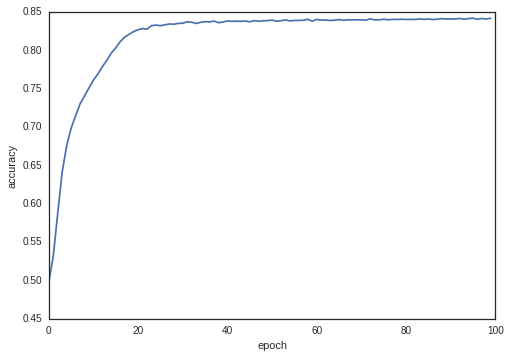

In [41]:
plt.plot(history.history['acc'])
plt.xlabel("epoch")
plt.ylabel("accuracy")

In [42]:
import h5py as h5py

In [43]:
model.save('arch1_var3.h5')

In [45]:
Acc_arch1_var3 = pd.DataFrame(history.history['acc'] , columns = ['Accuracy'])

In [47]:
Acc_arch1_var3.to_csv('Arch1_v3.csv')